In [1]:
import os
import tqdm
import time
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [2]:
%run ./MyNetwork.ipynb

In [3]:
_DATA_PATH = './UTKFace/'

2 ways to preprocess pictures
1. 200x200x3 (3 channels) --PCA--> 128
2. 200x200 (gray scale) --PCA--> 128

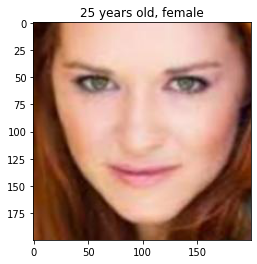

In [4]:
plt.imshow(np.array(Image.open(_DATA_PATH + os.listdir(_DATA_PATH)[6])))
plt.title('25 years old, female')
plt.show()

Utility functions:

In [5]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.3333, 0.3333, 0.3333])

def data_loader(DATA_PATH = _DATA_PATH, flatten = True):
    now = time.time()
    img_data = []
    age = []
    sex = []
    nationality = []
    for image_path in os.listdir(DATA_PATH):
        try:
            image = np.array(Image.open(DATA_PATH + image_path))
            image = rgb2gray(image.astype('float32'))
            image = image / 255
            if flatten: image = image.flatten()
            a = int(image_path.split('_')[0])
            s = int(image_path.split('_')[1])
            n = int(image_path.split('_')[2])
            img_data.append(image)
            age.append(a)
            sex.append(s)
            nationality.append(n)
        except:
            continue
    print('Dataset loaded in', time.time() - now, 'seconds.')
    return np.array(img_data), np.array(age), np.array(sex), np.array(nationality)

def PCA_(data, _n_components = 128):
    pca = PCA(n_components = _n_components, svd_solver = 'randomized')
    pca = pca.fit(data)
    data_reduced = pca.transform(data)
    return data_reduced

In [6]:
img_data, age, sex, nationality = data_loader()

Dataset loaded in 36.18961691856384 seconds.


Sample image:


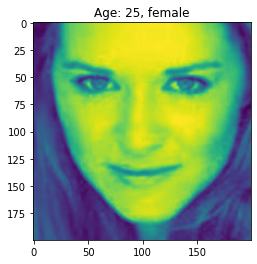

In [206]:
print('Sample image:')
plt.title('Age: ' + str(age[6]) + ', female')
plt.imshow(img_data[6].reshape((200, 200)))
plt.show()

In [8]:
reduced_img_data = PCA_(img_data, _n_components = 128)
reduced_img_data.shape

(23705, 128)

## MLP for age prediction

In [145]:
_age = age.reshape(-1, 1)

In [146]:
X_train, X_test, Y_train, Y_test = train_test_split(reduced_img_data, _age, test_size = 0.1, random_state = 42)

In [147]:
%run ./MyNetwork.ipynb

In [153]:
BATCH_SIZE = 128
CLASSES = 1
INPUT_SHAPE = 128
LEARNING_RATE = 0.001
MOMENTUM = 0.99
EPOCHS = 100

In [154]:
trainloader = Dataloader(X_train, Y_train, BATCH_SIZE)
testloader = Dataloader(X_test, Y_test)

In [155]:
network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(35, activation = LeakyReLU())
network.add_layer(6, activation = LeakyReLU())
network.add_layer(1, activation = LeakyReLU())
network.set_training_param(momentum = MOMENTUM, loss = L2(), lr = 'AUTO')

3 layers:
35 neurons	activation function: LeakyReLU 	Weights are initialized by random
6 neurons	activation function: LeakyReLU 	Weights are initialized by random
1 neurons	activation function: LeakyReLU 	Weights are initialized by random
Momentum:	0.99
Loss Function:	 L2


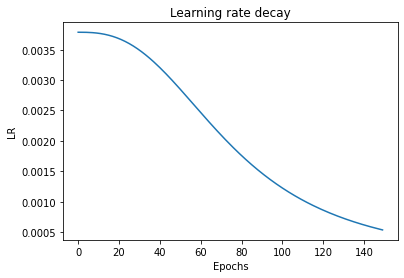

In [156]:
network.get_network_info()

In [157]:
result = network.fit(EPOCHS, trainloader, testloader, log = 1)

--------------- EPOCH: #0 ---------------
learning rate:	0.00379
trin Loss:	576.1779	test Loss:	324.6712

--------------- EPOCH: #1 ---------------
learning rate:	0.00379
trin Loss:	263.9626	test Loss:	278.3791

--------------- EPOCH: #2 ---------------
learning rate:	0.00379
trin Loss:	238.2079	test Loss:	253.4084

--------------- EPOCH: #3 ---------------
learning rate:	0.00379
trin Loss:	224.7175	test Loss:	250.5874

--------------- EPOCH: #4 ---------------
learning rate:	0.00378
trin Loss:	217.0533	test Loss:	242.6748

--------------- EPOCH: #5 ---------------
learning rate:	0.00378
trin Loss:	214.7685	test Loss:	299.703

--------------- EPOCH: #6 ---------------
learning rate:	0.00378
trin Loss:	217.4183	test Loss:	248.4371

--------------- EPOCH: #7 ---------------
learning rate:	0.00378
trin Loss:	208.6111	test Loss:	222.4809

--------------- EPOCH: #8 ---------------
learning rate:	0.00378
trin Loss:	197.2226	test Loss:	218.977

--------------- EPOCH: #9 ---------------
learni

--------------- EPOCH: #78 ---------------
learning rate:	0.00182
trin Loss:	124.6106	test Loss:	191.2953

--------------- EPOCH: #79 ---------------
learning rate:	0.00179
trin Loss:	124.8395	test Loss:	188.3861

--------------- EPOCH: #80 ---------------
learning rate:	0.00176
trin Loss:	125.3508	test Loss:	191.978

--------------- EPOCH: #81 ---------------
learning rate:	0.00173
trin Loss:	123.2699	test Loss:	191.3742

--------------- EPOCH: #82 ---------------
learning rate:	0.0017
trin Loss:	124.3085	test Loss:	184.0153

--------------- EPOCH: #83 ---------------
learning rate:	0.00167
trin Loss:	122.9755	test Loss:	185.9997

--------------- EPOCH: #84 ---------------
learning rate:	0.00164
trin Loss:	122.7775	test Loss:	189.5317

--------------- EPOCH: #85 ---------------
learning rate:	0.00161
trin Loss:	124.034	test Loss:	188.9087

--------------- EPOCH: #86 ---------------
learning rate:	0.00158
trin Loss:	122.9801	test Loss:	192.047

--------------- EPOCH: #87 --------------

In [135]:
train_losses, test_losses = result['train_loss'], result['test_loss']

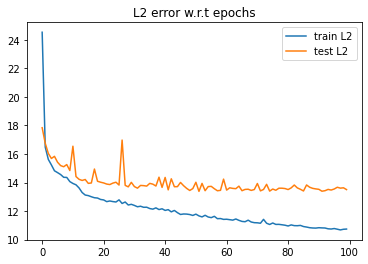

In [136]:
plt.plot(range(len(np.array(train_losses))), np.array(train_losses) ** (1/2), label = 'train L2')
plt.plot(range(len(np.array(test_losses))), np.array(test_losses) ** (1/2), label = 'test L2')
plt.title('L2 error w.r.t epochs')
plt.legend()

In [137]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(reduced_img_data, age.reshape(1, -1)[0])
res = clf.predict(reduced_img_data)
np.mean((res - age.reshape(1, -1)[0])**2) ** (1/2)

/Users/ali/Desktop/test/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


15.723420235231687

zero weight initialization

3 layers:
35 neurons	activation function: LeakyReLU 	Weights are initialized by zero
6 neurons	activation function: LeakyReLU 	Weights are initialized by zero
1 neurons	activation function: LeakyReLU 	Weights are initialized by zero
Momentum:	0.99
Loss Function:	 L2


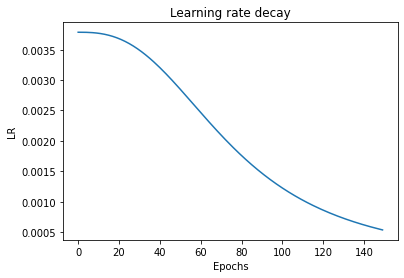

In [142]:
BATCH_SIZE = 128
CLASSES = 1
INPUT_SHAPE = 128
LEARNING_RATE = 0.001
MOMENTUM = 0.99
EPOCHS = 100

trainloader = Dataloader(X_train, Y_train, BATCH_SIZE)
testloader = Dataloader(X_test, Y_test)

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(35, activation = LeakyReLU(), initial_weight = 'zero')
network.add_layer(6, activation = LeakyReLU(), initial_weight = 'zero')
network.add_layer(1, activation = LeakyReLU(), initial_weight = 'zero')
network.set_training_param(momentum = MOMENTUM, loss = L2(), lr = 'AUTO')

network.get_network_info()

In [143]:
result = network.fit(EPOCHS, trainloader, testloader, log = 1)

--------------- EPOCH: #0 ---------------
learning rate:	0.00379
trin Loss:	1500.7609	test Loss:	1539.1333

--------------- EPOCH: #1 ---------------
learning rate:	0.00379
trin Loss:	1500.6695	test Loss:	1539.1333

--------------- EPOCH: #2 ---------------
learning rate:	0.00379
trin Loss:	1500.2372	test Loss:	1539.1333

--------------- EPOCH: #3 ---------------
learning rate:	0.00379
trin Loss:	1500.6254	test Loss:	1539.1333

--------------- EPOCH: #4 ---------------
learning rate:	0.00378
trin Loss:	1500.309	test Loss:	1539.1333

--------------- EPOCH: #5 ---------------
learning rate:	0.00378
trin Loss:	1500.2291	test Loss:	1539.1333

--------------- EPOCH: #6 ---------------
learning rate:	0.00378
trin Loss:	1500.8333	test Loss:	1539.1333

--------------- EPOCH: #7 ---------------
learning rate:	0.00378
trin Loss:	1500.7551	test Loss:	1539.1333

--------------- EPOCH: #8 ---------------
learning rate:	0.00378
trin Loss:	1500.1924	test Loss:	1539.1333

--------------- EPOCH: #9 ---

--------------- EPOCH: #77 ---------------
learning rate:	0.00185
trin Loss:	1500.6829	test Loss:	1539.1333

--------------- EPOCH: #78 ---------------
learning rate:	0.00182
trin Loss:	1500.1264	test Loss:	1539.1333

--------------- EPOCH: #79 ---------------
learning rate:	0.00179
trin Loss:	1500.3114	test Loss:	1539.1333

--------------- EPOCH: #80 ---------------
learning rate:	0.00176
trin Loss:	1501.2933	test Loss:	1539.1333

--------------- EPOCH: #81 ---------------
learning rate:	0.00173
trin Loss:	1500.3647	test Loss:	1539.1333

--------------- EPOCH: #82 ---------------
learning rate:	0.0017
trin Loss:	1500.266	test Loss:	1539.1333

--------------- EPOCH: #83 ---------------
learning rate:	0.00167
trin Loss:	1500.3138	test Loss:	1539.1333

--------------- EPOCH: #84 ---------------
learning rate:	0.00164
trin Loss:	1501.1854	test Loss:	1539.1333

--------------- EPOCH: #85 ---------------
learning rate:	0.00161
trin Loss:	1500.9611	test Loss:	1539.1333

--------------- EPOCH

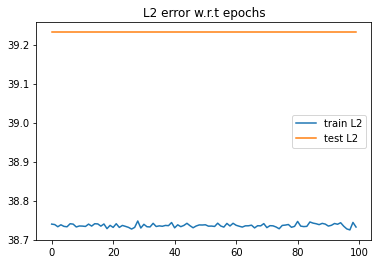

In [144]:
train_losses, test_losses = result['train_loss'], result['test_loss']

plt.plot(range(len(np.array(train_losses))), np.array(train_losses) ** (1/2), label = 'train L2')
plt.plot(range(len(np.array(test_losses))), np.array(test_losses) ** (1/2), label = 'test L2')
plt.title('L2 error w.r.t epochs')
plt.legend()

learning rate

In [168]:
BATCH_SIZE = 128
CLASSES = 1
INPUT_SHAPE = 128
LEARNING_RATE = 0.001
MOMENTUM = 0.8
EPOCHS = 100

trainloader = Dataloader(X_train, Y_train, BATCH_SIZE)
testloader = Dataloader(X_test, Y_test)

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(35, activation = LeakyReLU())
network.add_layer(6, activation = LeakyReLU())
network.add_layer(1, activation = LeakyReLU())
network.set_training_param(momentum = MOMENTUM, loss = L2(), lr = LEARNING_RATE)

network.get_network_info()

3 layers:
35 neurons	activation function: LeakyReLU 	Weights are initialized by random
6 neurons	activation function: LeakyReLU 	Weights are initialized by random
1 neurons	activation function: LeakyReLU 	Weights are initialized by random
Momentum:	0.8
Loss Function:	 L2
Learning rate:	0.001


In [169]:
result = network.fit(EPOCHS, trainloader, testloader, log = 0)

-------------------------------
--- Tooks 16.738(s) to fit. ---
-------------------------------


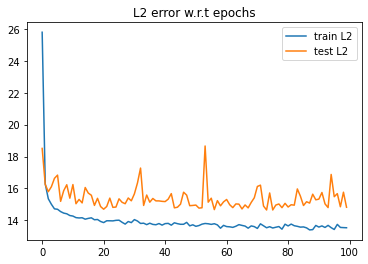

In [170]:
train_losses, test_losses = result['train_loss'], result['test_loss']

plt.plot(range(len(np.array(train_losses))), np.array(train_losses) ** (1/2), label = 'train L2')
plt.plot(range(len(np.array(test_losses))), np.array(test_losses) ** (1/2), label = 'test L2')
plt.title('L2 error w.r.t epochs')
plt.legend()

## MLP for nationality prediction

In [171]:
%run ./MyNetwork.ipynb

In [172]:
_nationality = nationality.reshape(-1, 1)
onehot_nationality = OneHotEncoder().fit_transform(_nationality).toarray()

In [173]:
X_train, X_test, Y_train, Y_test = train_test_split(reduced_img_data, onehot_nationality, test_size= 0.12, random_state=42)

In [186]:
BATCH_SIZE = 120
CLASSES = onehot_nationality.shape[1]
INPUT_SHAPE = 128
LEARNING_RATE = 0.002
MOMENTUM = 0.9
EPOCHS = 300

In [187]:
trainloader = Dataloader(X_train, Y_train, BATCH_SIZE)
testloader = Dataloader(X_test, Y_test)

In [188]:
network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(50, activation = LeakyReLU(), w_limit = 'LOW')
network.add_layer(3, activation = LeakyReLU(), w_limit = 'LOW')
network.add_layer(CLASSES, activation = Softmax(), w_limit = 'LOW')
network.set_training_param(momentum = MOMENTUM, loss = CrossEntropySoftmax(), lr = LEARNING_RATE)

In [189]:
network.get_network_info()

3 layers:
50 neurons	activation function: LeakyReLU 	Weights are initialized by random
3 neurons	activation function: LeakyReLU 	Weights are initialized by random
5 neurons	activation function: Softmax 	Weights are initialized by random
Momentum:	0.9
Loss Function:	 CrossEntropySoftmax
Learning rate:	0.002


In [190]:
result = network.fit(EPOCHS, trainloader, testloader, log = 0, acc = True)

-------------------------------
--- Tooks 65.606(s) to fit. ---
-------------------------------


In [191]:
train_losses, test_losses = result['train_loss'], result['test_loss']
train_accs, test_accs = result['train_acc'], result['test_acc']

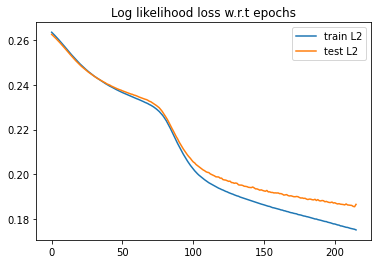

In [199]:
plt.plot(range(len(train_losses[84:])), np.array(train_losses[84:]), label = 'train L2')
plt.plot(range(len(test_losses[84:])), np.array(test_losses[84:]), label = 'test L2')
plt.title('Log likelihood loss w.r.t epochs')
plt.legend()

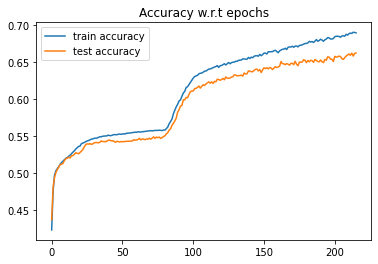

In [200]:
plt.plot(range(len(train_accs[84:])), np.array(train_accs[84:]), label = 'train accuracy')
plt.plot(range(len(test_accs[84:])), np.array(test_accs[84:]), label = 'test accuracy')
plt.title('Accuracy w.r.t epochs')
plt.legend()

## MLP for sexuality prediction

In [31]:
%run ./MyNetwork.ipynb

In [32]:
_sex = sex.reshape(-1, 1)
onehot_sex = OneHotEncoder().fit_transform(_sex).toarray()

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(reduced_img_data, onehot_sex, test_size= 0.12, random_state=42)

In [201]:
BATCH_SIZE = 128
CLASSES = onehot_sex.shape[1]
INPUT_SHAPE = 128
LEARNING_RATE = 0.0025
MOMENTUM = 0.9
EPOCHS = 180

In [202]:
trainloader = Dataloader(X_train, Y_train, BATCH_SIZE)
testloader = Dataloader(X_test, Y_test)

In [203]:
network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(44, activation = LeakyReLU(), w_limit = 'LOW')
network.add_layer(8, activation = LeakyReLU(), w_limit = 'LOW')
network.add_layer(2, activation = LeakyReLU(), w_limit = 'LOW')
network.set_training_param(momentum = MOMENTUM, loss = L2(), lr = 'AUTO')

3 layers:
44 neurons	activation function: LeakyReLU 	Weights are initialized by random
8 neurons	activation function: LeakyReLU 	Weights are initialized by random
2 neurons	activation function: LeakyReLU 	Weights are initialized by random
Momentum:	0.9
Loss Function:	 L2


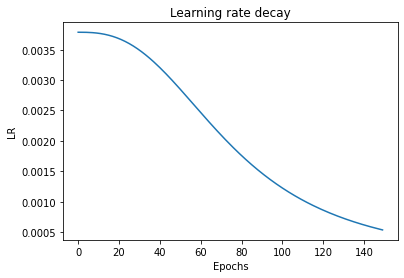

In [204]:
network.get_network_info()

In [38]:
result = network.fit(EPOCHS, trainloader, testloader, log = 0, acc = True)

-------------------------------
--- Tooks 36.686(s) to fit. ---
-------------------------------


In [39]:
train_losses, test_losses = result['train_loss'], result['test_loss']
train_accs, test_accs = result['train_acc'], result['test_acc']

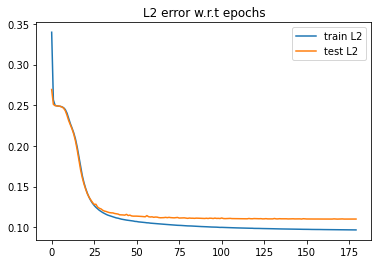

In [40]:
plt.plot(range(180), np.array(train_losses), label = 'train L2')
plt.plot(range(180), np.array(test_losses), label = 'test L2')
plt.title('L2 error w.r.t epochs')
plt.legend()

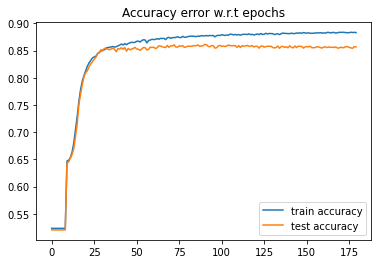

In [41]:
plt.plot(range(180), np.array(train_accs), label = 'train accuracy')
plt.plot(range(180), np.array(test_accs), label = 'test accuracy')
plt.title('Accuracy error w.r.t epochs')
plt.legend()